## Travaux pratiques sur le traitement d'images avec Python

Le traitement d'images est une discipline de l'informatique et des mathématiques appliquées qui étudie les images numériques et leurs transformations, dans le but d'améliorer leur qualité ou d'en extraire de l'information (wikipedia). C'est un domaine de pointe qui sollicite un grand nombre de chercheurs à proposer de nouvelles méthodes de traitement d'images ou à améliorer celles existantes.
Ce TP constitue une introduction au traitement d'images avec Python, plus spécifiquement en utilisant la librairie "scikit-image". Dans cette librairie, les images sont stockées sous forme d'un tableau "numpy". Pour cela, nous commencerons par fournir les notions nécessaire pour créer et modifier les tableaux "numpy". Nous utliserons la libraire "matplotlib" pour afficher les images traitées. D'où, une introduction brève à l'affichage d'images avec cette libraire est aussi prévue.

## Tabelaux Numpy

"Numpy" est la librairie de calcul scientifique par excellence de Python. Nous nous intéressons particulièrement à la création de tableaux multidimensionnels ainsi qu'aux outils et fonctions qui permettent de manipuler ces tableaux.

Il faut commencer à importer la librairie "numpy" supposée être installée via la commande "pip" (voir la vidéo introductive)

In [119]:
import numpy as np

### Création de tableaux

Un tableau "numpy" (array) unidimensionnel ressemble à une liste, sauf que tous ses éléments doivent être de même type. Pour créer un tableau on utilise la fonction "array" de "numpy" en lui passant 2 arguments, le 1er étant une liste d'éléments, le 2nd (facultatif) renseigne sur le type des éléments :

In [120]:
a = np.array([1, 2, 3],dtype=np.float64)  #créer un tableau de 1 dimension en precisant le type des éléments
b=np.array([1,2,3])            #le type n'est pas précisé. Python assigne le type entier
print('a:',a)
print('b:',b)
print(b.dtype)

a: [1. 2. 3.]
b: [1 2 3]
int32


On peut créer des tableaux "numpy" multidimensionnels en utilisant les listes imbriquées : 

In [121]:
c = np.array([[1,2,3],[4,5,6]])   #créer un tableau de 2 dimensions
print(c)

[[1 2 3]
 [4 5 6]]


L'exemple précédent est une matrice (tableau bidimensionnel) contenant 2 lignes et 3 colonnes.

Le format d'un tableau (a.shape) est un tuple qui renseigne sur le nombre d'éléments du tableau de chaque dimension. La taille d'un tableau (a.size) renseigne sur le nombre d'éléments du tableau. 

In [122]:
print('a :',a)
print('format de a :',a.shape)
print('c :',c)
print('format de c :',c.shape)
print('taille de c :',c.size)

a : [1. 2. 3.]
format de a : (3,)
c : [[1 2 3]
 [4 5 6]]
format de c : (2, 3)
taille de c : 6


La commande suivante va créer un tableau de 3 dimensions :

In [123]:
t=np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
print('t:',t)
print('format de t:',t.shape)

t: [[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
format de t: (2, 2, 2)


Il est possible de générer des tableaux automatiques avec des fonctions "numpy" :

In [124]:
a1 = np.zeros((2,2))  #créer un tableau d'élements nuls de 2 lignes 2 colonnes
print(a1)

[[0. 0.]
 [0. 0.]]


In [125]:
a2 = np.ones((1,2))   #créer un tableau de 1 ligne et 2 colonnes
print(a2)

[[1. 1.]]


In [126]:
a3 = np.full((2,2),7) #créer un tableau d'élemets constants égaux a 7
print(a3)

[[7 7]
 [7 7]]


In [127]:
a4 = np.random.random((2,2)) #créer un tableau de valeurs aléatoires entre 0 et 1 
print(a4)

[[0.53859984 0.48973771]
 [0.25333646 0.28250541]]


La fonction "arange" de "numpy" permet de générer des tableaux unidimensionnels en progression arithmétique :

In [128]:
ar1=np.arange(4,10,2) #les nombres de 4 à 8 avec un pas de 2
print('ar1:',ar1)
ar2=np.arange(10) #les nombres de 0 à 9 avec un pas de 1
print('ar2:',ar2)


ar1: [4 6 8]
ar2: [0 1 2 3 4 5 6 7 8 9]


### Accès aux éléments d'un tableau

Pour accéder à un élément d'un tableau on utilise le nom du tableau suivi d'un couple de crochets contenant un tuple formé par les indices de l'élément sur chaque dimension. 

In [129]:
print('a:',a)
print(a[(1,)]) #acceder au premier élément
print(a[1]) # a[1] est equivalent à a[(1,)]
print('c:',c )
print(c[0, 0]) #acceder a l'élement à la 1ère ligne, 1ère colonne
print(c[1, 2]) #acceder a l'élement à la 2ème ligne, troisieme colonne

a: [1. 2. 3.]
2.0
2.0
c: [[1 2 3]
 [4 5 6]]
1
6


Pour changer la valeur d'un élement :

In [130]:
c[0,0]=8
print(c)
a[2]=16
print(a)

[[8 2 3]
 [4 5 6]]
[ 1.  2. 16.]


L'extraction de sous tableaux se fait à partir de 2 techniques : en utilisant les tranches (slicing) ou à travers l'indexation avancée. Les tranches s'appliquent comme dans le cas des listes. les indices des éléments à extraire sont formés par des tuples : 

In [131]:
d=np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]]) #2 dimensions, 3 lignes 4 colonnes
print('d:',d)
print(d.shape)
d1=d[1:3,:]  #extraction des 2 dernières lignes, on peut écrire aussi d1=d[1:3]
print('d1:',d1)
d2=d[:2,:2] #sous tableau formé par les élements des 2 1ères lignes et 2 1ères colonnes
print('d2:',d2)
d3=d[:,1:] #extraction des 3 dernières colonnes
print('d3:',d3)

d: [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
(3, 4)
d1: [[ 5  6  7  8]
 [ 9 10 11 12]]
d2: [[1 2]
 [5 6]]
d3: [[ 2  3  4]
 [ 6  7  8]
 [10 11 12]]


Une tranche référence toujours le tableau d'origine. N'importe quelle modification du tableau d'origine entraine celle de la tranche. Pour rompre le lien entre la tranche et le tableau principal on utilise la méthode "copy".

In [132]:
d[2,:]=[100,200,300,400] #modification de la derniere ligne de d
print('d1:',d1)  #entraine la modifcation de tranche d1 
d4=d[:2,1:2].copy() #extraction de la 2eme colonne des 2 1ères lignes en rompant le lien avec le tableau d'origine
print('d4:',d4)
d[0,1]=100
print('d4:',d4)


d1: [[  5   6   7   8]
 [100 200 300 400]]
d4: [[2]
 [6]]
d4: [[2]
 [6]]


L'indexation avancée permet d'extraire des sous-tableaux arbitraires sans référence au tableau d'origine. Les indices sont les éléments de listes ou de tableaux au lieu des tuples.

In [133]:
print('d:',d)
dd1=d[[1,2],:]  #extraction des 2eme et 3eme lignes 
print('dd1:',dd1)
d[1,0]=900 #la modification du tableau initial n'a pas d'effet sur le sous-tableau
print('dd1:',dd1)
dd2=d[[0,2],[0,1]]
print('dd2:',dd2)

d: [[  1 100   3   4]
 [  5   6   7   8]
 [100 200 300 400]]
dd1: [[  5   6   7   8]
 [100 200 300 400]]
dd1: [[  5   6   7   8]
 [100 200 300 400]]
dd2: [  1 200]


In [158]:
e = np.array([[1,2], [3, 4], [5, 6]])
print('e:',e)
print(e[[0, 1, 2], [0, 1, 0]])   #extraire les élements de la 1ère lig,1ère col et 2ème lig,2ème col et 3ème lig, 1ère col   
print(np.array([e[0, 0], e[1, 1], e[2, 0]])) #cette commande est équivalente à la précédente

e: [[1 2]
 [3 4]
 [5 6]]
[1 4 5]
[1 4 5]


In [135]:
aa = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
bb = np.array([0, 2, 0])
#utiliser arange pour extraire les éléments d'un tableau
print(aa[np.arange(3), bb])  #extraire les éléments de la 1ère lig,1ère col et de la 2ème lig, 3ème col et de la 3ème lig,1ère col

[1 7 9]


L'indexation logique d'un tableau nous permet de sélectionner des éléments qui satisfont une condition donnée :

In [162]:
import numpy as np

t1 = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (t1<5)  #trouver les éléments de t1 qui sont inf à  
                    #le retour est un tableau numpy de valeurs logiques ayant le même format que t1
                    
print(bool_idx)

[[ True  True]
 [ True  True]
 [False False]]


In [164]:
print(t1[bool_idx]) #pour extraire de t1 les valeurs inf à 
#on aurait pu faire directement 
print(t1[t1<5])  

[1 2 3 4]
[1 2 3 4]


Vous pouvez à tout moment vous référer à la <a href="https://docs.scipy.org/doc/numpy/">documentation</a> de numpy pour mieux apprendre sur l'indexation des tableaux, sur les fonctions mathématiques intégrées dans "numpy" ainsi que sur les opérations mathématiques réalisées sur les tableaux.  

## Création de graphiques avec Matplotlib

Matplotlib est une librairie de Python qui permet de créer des graphiques. Nous allons par la suite fournir une introduction brève sur le module "matplotlib.pyplot" de cette librairie. Il faut commencer à importer le module en question en supposant que la librairie est déjà installée avec la commande "pip" (voir vidéo introductive).

In [138]:
import matplotlib.pyplot as plt

Il faut exécuter la commande "iPython" suivante dans le but de pouvoir afficher les graphiques dans les sections du notebook.

In [139]:
%matplotlib inline

### Création de graphiques

La fonction la plus importante dans "matplotlib" est "plot". Elle permet de créer des graphiques avec des données bidimensionnelles :

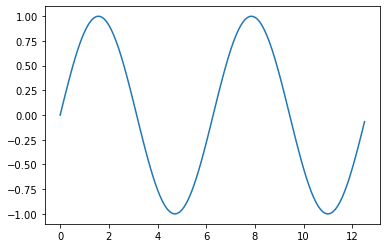

In [166]:
#on va dessiner la courbe de la fonction sin dans [0,4*pi]
x = np.arange(0, 4 * np.pi, 0.1) #générer des valeurs de 0 à 4*pi avec un pas de 0.1 pour former le vecteur des abscisses
y = np.sin(x) #vecteur des ordonnées
# dessiner les points avec plot
plt.plot(x, y)

On peut aussi dessiner sur le même graphique les courbes des fonctions sinus et cosinus. 

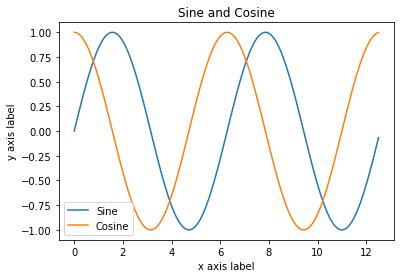

In [167]:
y_sin = np.sin(x)
y_cos = np.cos(x)

plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label') #ajouter un titre pour l'axe des abscisses
plt.ylabel('y axis label') #ajouter un titre pour l'axe des ordonnées
plt.title('Sine and Cosine') #ajouter un titre pour le graphique
plt.legend(['Sine', 'Cosine']) #ajouter une légende

### Afficher plusieurs graphiques sur la même figure avec subplot

Text(0.5, 1.0, 'Cosine')

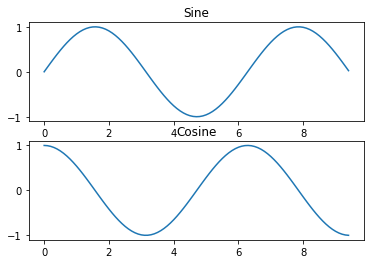

In [168]:
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

#créer une grille de 2 lignes et 1 colonne et rendre le premier subplot actif

plt.subplot(2, 1, 1)

#Dessiner la courbe de la fonction sinus
plt.plot(x, y_sin)
plt.title('Sine')

#rendre le deuxième subplot actif et dessiner la courbe du cosinus
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

Vous pouvez vous référer à la <a href="https://matplotlib.org/tutorials/introductory/pyplot.html">documentation</a> de "pyplot" pour plus d'aide sur la création de graphiques.

# Traitement d'images avec la libraire scikit-image

La libraire scikit-image regroupe les modules qui permettent de manipuler les images. Dans ce qui suit, nous allons apprendre comment numériser , modifier et afficher les images. Nous allons aussi apprendre quelques techniques de segementation dans le but de simplifier une image et d'en extraire les informations qui nous intéressent. 

Une image est représentée par un tableau "numpy". Une image est faite de pixels disposés suivant deux dimesions. Le pixel de coordonnées (0,0) est le pixel le plus haut et à gauche de l'image. L'axe des abscisses est un axe orienté de gauche à droite. Celui des ordonnées est un axe orienté de haut en bas.

## Lecture, affichage et modification d'une image en niveaux de gris

Quand l'image est en représentée en niveaux de gris (grayscale image), un pixel a une valeur qui va de 0 à 255. un pixel de valeur 0 a une couleur noire et un pixel de valeur 255 a une couleur blanche. Les pixels de valeurs 1 à 254 représentent les niveaux de gris, du gris foncé au gris clair. Pour lire une image ou numériser, on utilse la fonction "imread" du module "io" de la libraire "skimage" (alias de scikit-image). Pour afficher une image, on utilise la fonction "imshow" du module "pyplot" de la libraire "matplotlib". Dans l'exemple suivant, on va lire une image en niveaux de gris et l'afficher :  

format de limage: (512, 512)


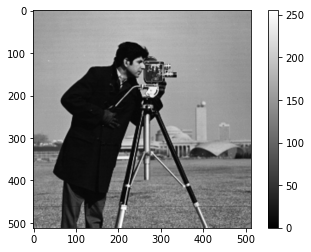

In [143]:
from skimage import io
from matplotlib import pyplot as plt

im_cammen=io.imread('../images/cameraman.png') #lire ou numériser une image
print('format de l''image:',im_cammen.shape) #l'image est en 2 dimensions contenant 512x512 pixels 
plt.imshow(im_cammen,cmap='gray') #cmap='gray' pour afficher l'image en niveaux de gris  
plt.colorbar() #la barre qui s'affiche à droite de l'image permet de voir les différents niveaux de gris présents ds l'image


 Par exemple, en utilisant le slicing d'un tableau "numpy", on peut modifier l'image pour qu'elle contienne un carré blanc centré sur l'image de côté 100 pixels :  

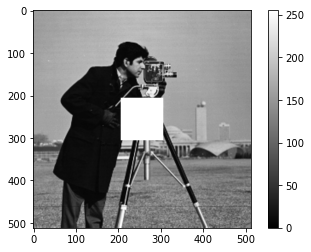

In [144]:
im_cammen[206:306,206:306]=255
plt.imshow(im_cammen,cmap='gray')
plt.colorbar()

Simulation d'images : on peut générer une image en niveaux de gris aléatoires en utilisant la fonction "random.randint" de "numpy" :

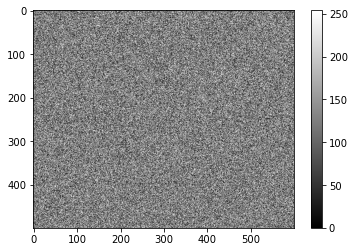

In [146]:
random_image = np.random.randint(0,255,[500,600]) #générer un tableau de 500x600 valeurs pseudo-aléatoires entre 0 et 255
plt.imshow(random_image, cmap='gray')
plt.colorbar();

Remarque : les 256 niveaux de gris peuvent être exprimés entre 0 et 1. Ainsi un pixel de valeur 0 et un pixel noir et un pixel de valeur 1 est un pixel blanc.  Pour faire le même travail qu'avant on peut utiliser la fonction "random.random" qui permet de générer des valeurs pseudo-aléatoires entre 0 et 1.

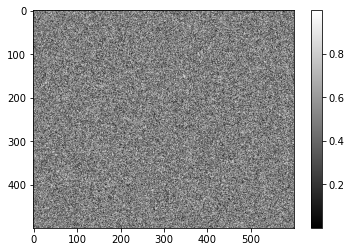

In [147]:
random_image = np.random.random([500,600]) #générer un tableau de 500x600 valeurs pseudo-aléatoires entre 0 et 255
plt.imshow(random_image, cmap='gray')
plt.colorbar();

Le module "draw" permet de génerer les coordonnées géometriques des pixels appartenant à une forme géométrique donnée. Par exemple, si on veut modifier l'image précédente pour qu'elle contienne un disque de rayon 100 pixels centré sur l'image et de couleur noire on fait : 

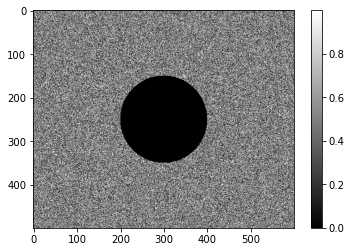

In [148]:
from skimage import draw
rows, cols = draw.circle(250, 300, 100)  #rows et cols contiennent les coordonnées des pixels inclus dans ce disque
random_image[rows,cols]=0 #changer à 1 pour avoir une couleur blanche
plt.imshow(random_image, cmap='gray')
plt.colorbar();

## Lecture, affichage et modification d'une image en couleurs

Nous nous intéresserons aux images codées suivant le modèle RGB. Dans ce modèle, chaque pixel a trois valeurs, chaque valeur correspond à une des trois composantes : rouge (Red), vert(Green) et bleu (blue) et peut aller de 0 à 255. Quand toutes les valeurs sont nulles, le pixel a la couleur noire. Quand toutes les valeurs sont à 255, le pixel a la couleur blanche. Quand la valeur de la composante rouge est à 255 et les autres valeurs sont nulles, le pixel a la couleur rouge. Le nombre de couleurs utilisées pour coder une image vaut 256x256x256=16,777,216 couleurs. Le tableau "numpy" utilisé pour représenter l'image a 3 dimensions : les 2 premières dimensions contiennent les coordonnées géométriques du pixel et la 3ème dimension spécifie la composante RGB (0 pour rouge, 1 pour vert, 2 pour bleu).

Format de limage: (177, 284, 3)


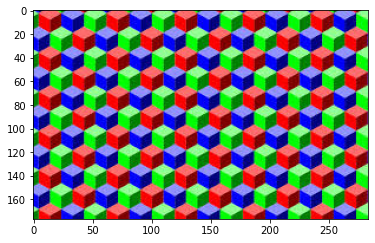

In [172]:
im_blocs=io.imread('../images/blocs.jpg') #lire une image en couleur 
print('Format de l''image:',im_blocs.shape) #le nombre de dimensions du tableau correspondant est 3
plt.imshow(im_blocs)

Dans l'exemple suivant, nous allons afficher l'image précédente ainsi que 3 autres images représentant chacune une des 3 composantes RGB de l'image en couleur. 

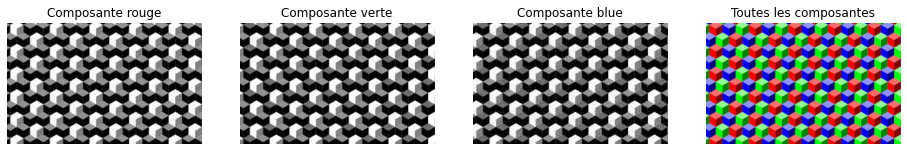

In [177]:
red = im_blocs[:,:,0]
green = im_blocs[:,:,1]
blue = im_blocs[:,:,2]

# --- display the image and r, g, b channels ---

f, axes = plt.subplots(1, 4, figsize=(16, 5)) #pour afficher plusieurs graphiques sur la même ligne en spécifiant la taille des images

for ax in axes:
    ax.axis('off')  #masquer les axes de tous les graphiques  

(ax_r, ax_g, ax_b, ax_color) = axes
    
ax_r.imshow(red, cmap='gray')
ax_r.set_title('Composante rouge')

ax_g.imshow(green, cmap='gray')
ax_g.set_title('Composante verte')

ax_b.imshow(blue, cmap='gray')
ax_b.set_title('Composante blue')

# --- Here, we stack the R, G, and B layers again
#     to form a color image ---
ax_color.imshow(im_blocs)
ax_color.set_title('Toutes les composantes');

On peut remarquer que dans l'image de la composante rouge, les blocs rouges apparaissent en couleur claire. 

Pour transformer une image en couleur en une image en niveaux de gris on utilise la fonction "rgb2gray" du module "color" de la librairie scikit-image :

Text(0.5, 1.0, 'Niveaux de gris')

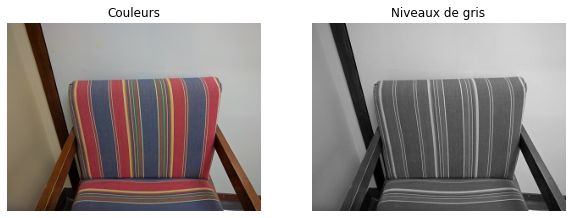

In [178]:
from skimage import color

im_chaise_c=io.imread('../images/chaise.jpg')
im_chaine_g=color.rgb2gray(im_chaise_c)

f, axes = plt.subplots(1, 2, figsize=(10, 10)) #pour afficher plusieurs graphiques sur la même ligne en spécifiant la taille des images

for ax in axes:
    ax.axis('off')  #masquer les axes de tous les graphiques  

(ax_c, ax_g) = axes
    
ax_c.imshow(im_chaise_c)
ax_c.set_title('Couleurs')

ax_g.imshow(im_chaine_g, cmap='gray')
ax_g.set_title('Niveaux de gris')



Simulation d'images en couleur : on va par la suite générer une image en couleurs contenant 3 disques de couleurs différentes :

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


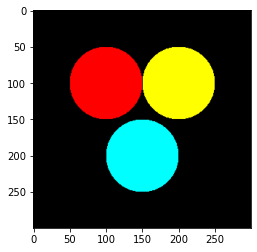

In [152]:
image = np.zeros((300, 300,3)) #on crée initialement un tableau de valeurs nulles pour représenter la couleur noire
[rows_r, cols_r] = draw.circle(100, 100, 50)
image[rows_r, cols_r] = [255,0,0]  #couleur rouge on peut aussi mettre [1,0,0]
rows_y, cols_y = draw.circle(100, 200, 50)
image[rows_y, cols_y] = [255,255,0] #couleur jaune
rows_c, cols_c = draw.circle(200, 150, 50)
image[rows_c, cols_c] = [0,255,255]
plt.imshow(image)

## Transformer une image 

Dans ce qui suit, nous allons utiliser le module "transform" de la librairie "scikit-image" pour tourner (rotate) et changer la taille d'une image (resize) :

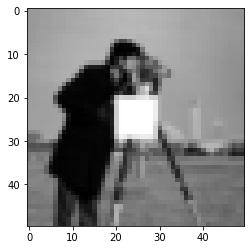

In [175]:
from skimage import transform

im_cammen_resized=transform.resize(im_cammen,(50,50)) #changer la taille de l'image à 50x50 pixels
plt.imshow(im_cammen_resized,cmap='gray')  #on remarque l'effet de pixellisation


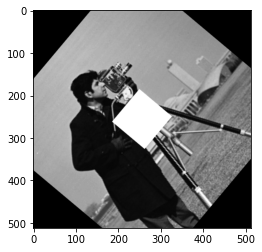

In [176]:
im_cammen_rotated=transform.rotate(im_cammen,50) #tourner l'image autour de son centre de 50 deg dans le sens contraire à celui des aguilles d'une montre
plt.imshow(im_cammen_rotated,cmap='gray')


## Segmenter une image 


La segmentation d'images est une opération de traitement d'images qui a pour but de rassembler des pixels entre eux suivant des critères pré-définis. Les pixels sont ainsi regroupés en régions, qui constituent un pavage ou une partition de l'image. Il peut s'agir par exemple de séparer les objets du fond. Si le nombre de classes est égal à deux, elle est appelée aussi binarisation.

Si l'homme sait naturellement séparer des objets dans une image c'est grâce à des connaissances de haut niveau (compréhension des objets et de la scène). Mettre au point des algorithmes de segmentation de haut niveau (chaque région est un objet sémantique) est encore un des thèmes de recherche les plus courants en traitement d'images.

La segmentation est une étape primordiale en traitement d'image. À ce jour, il existe de nombreuses méthodes de segmentation, que l'on peut regrouper en quatre principales classes :

1- La segmentation fondée sur les régions (en anglais : region-based segmentation). On y trouve par exemple : la croissance de région (en anglais : region-growing), décomposition/fusion (en anglais : split and merge).
2- La segmentation fondée sur les contours (en anglais : edge-based segmentation).
3- La segmentation fondée sur la classification ou le seuillage des pixels en fonction de leur intensité (en anglais : classification ou thresholding).
4- La segmentation fondée sur la coopération entre les trois premières segmentations.
(extrait de wikipedia)
La librairie "scikit-image" inclut plusieurs modules qui contiennent des fonctions pour segmenter des images suivant les catégories susmentionnées. Nous allons dans la suite travailler sur le seuillage d'une image (thresholding) et sur la détection de contours.     

Dans l'exemple suivant, nous allons utiliser une méthode de seuillage qui s'appelle Otsu thresholding qui permet de déterminer le seuil qui permet de segmenter une image en niveaux de gris en une image binaire (noir et blanc) en vu de séparer les objets du fond d'écran :  

Text(0.5, 1.0, 'Image binaire')

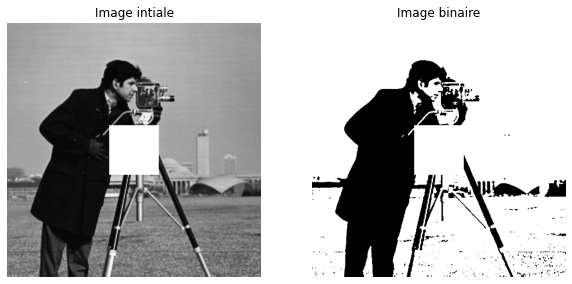

In [155]:
from skimage.filters import threshold_otsu

thresh = threshold_otsu(im_cammen) #seuil à partir du duquel se fait la séparation des pixels
im_cammen_bin = im_cammen > thresh

f,axes = plt.subplots(1, 2, figsize=(10, 10)) #pour afficher plusieurs graphiques sur la même ligne en spécifiant la taille des images

for ax in axes:
    ax.axis('off')  #masquer les axes de tous les graphiques  

(ax_c, ax_b) = axes  #ax_c référene le graphique à gauche et ax_b celui de droite
    
ax_c.imshow(im_cammen,cmap='gray')
ax_c.set_title('Image intiale')

ax_b.imshow(im_cammen_bin,cmap='gray')
ax_b.set_title('Image binaire')


Nous remarquons dans l'image résultat que les pixels sont partitionnés en 2 classes. Les pixels du fond en blanc et les pixels de l'avant-plan en noir.  

Dans l'exemple suivant, nous allons utiliser le filtre "sobel" qui permet de détecter les contours des objets dans l'image.

Text(0.5, 1.0, 'Avec détection de contours')

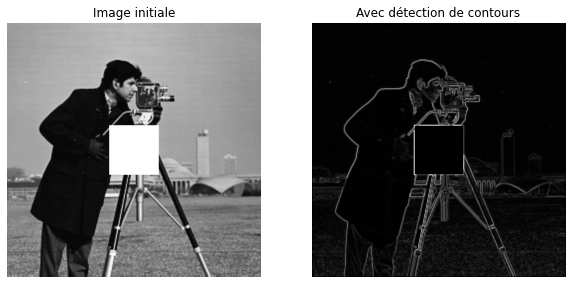

In [180]:
from skimage.filters import sobel

sobel_cammen=sobel(im_cammen)

f,axes = plt.subplots(1, 2, figsize=(10, 10)) #pour afficher plusieurs graphiques sur la même ligne en spécifiant la taille des images

for ax in axes:
    ax.axis('off')  #masquer les axes de tous les graphiques  

(ax_c, ax_g) = axes
    
ax_c.imshow(im_cammen,cmap='gray')
ax_c.set_title('Image initiale')

ax_g.imshow(sobel_cammen,cmap='gray')
ax_g.set_title('Avec détection de contours')

Nous remarquons dans l'image résultat que les pixels constituant les contours des objets sont en blanc. 

Dans l'exercice suivant, nous allons segmenter une image en couleurs contenant des étoiles. Le but est de pouvoir détecter le nombre d'étoiles présents ainsi que leur emplacement sur l'image. Pour réaliser ce travail, on propose de passer par les étapes suivantes :

1-Lire l'image en couleurs.

2-Transformer l'image en couleurs en une image en niveaux de gris.

3-Utiliser le "Otsu Thresholding" pour séparer les étoiles de l'arrière-plan. Les pixels constituant les étoiles seront en blanc et le reste des pixels sera en noir.

4-Détecter la présence d'objets formé de pixels blancs connectés. Le module "measure" de "scikit-image" permet de réaliser ceci avec la fonction "regionprops".

Nombre d'objets d'étoiles: 27


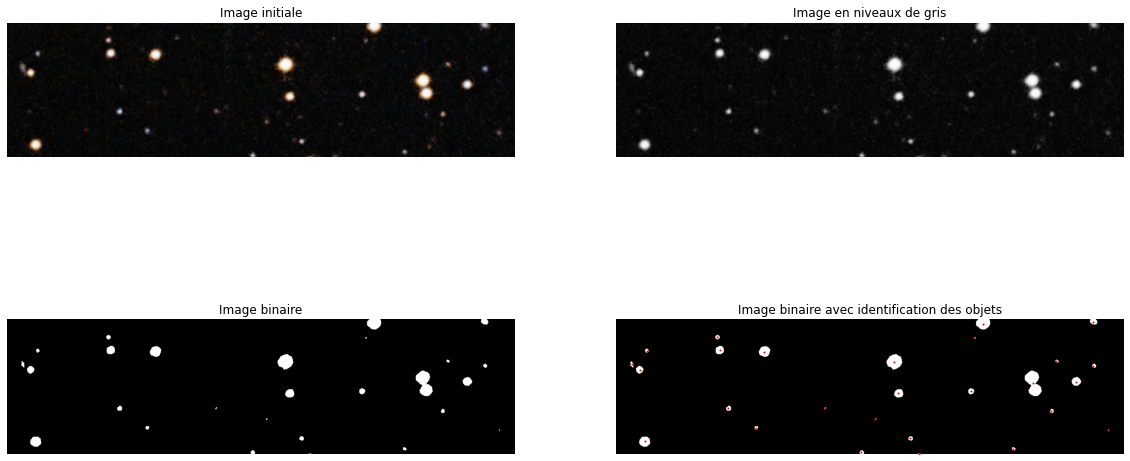

In [157]:
from skimage.measure import label,regionprops

im_stars=io.imread('../images/stars.jpg')
im_stars_gray=color.rgb2gray(im_stars) #transformer l'image en niveaux de gris
thresh = threshold_otsu(im_stars_gray) #appliquer le seuillage de Otsu
im_stars_binary = im_stars_gray >thresh #générer l'image binaire

label_img = label(im_stars_binary) 
regions = regionprops(label_img)      #détecter les objets formés par les pixels blancs (les étoiles)
print("Nombre d'objets d'étoiles:",len(regions))

f,axes = plt.subplots(2, 2,figsize=(20, 10)) #pour afficher 4 graphiques sur deux lignes

for lig in axes:
  for ax in lig: 
      ax.axis('off')  #masquer les axes de tous les graphiques  

((ax1,ax2),(ax3,ax4)) = axes

ax1.imshow(im_stars, cmap='gray')
ax1.set_title('Image initiale')

ax2.imshow(im_stars_gray, cmap='gray')
ax2.set_title('Image en niveaux de gris')

ax3.imshow(im_stars_binary, cmap='gray')
ax3.set_title('Image binaire')

ax4.imshow(im_stars_binary, cmap='gray')
ax4.set_title('Image binaire avec identification des objets')


for props in regions:
    y0, x0 = props.centroid
    ax4.plot(x0, y0, '.r', markersize=2) #afficher des points rouges au centre des objets détectés


Dans la dernière image, on remarque que la plupart des étoiles disjointes sont détectées. Cependant, on remarque que 2 étoiles qui se connectent sont considérées comme un seul objet. Dans ce cas, il faut faire appel à des méthodes de segmentation avancées qui permettent de détecter les objets même s'ils se connectent comme la segmentation Watershed. 

Ce TP constitue une introduction au traitement d'images avec Python. Il y a plein de documentation en ligne qui vous permettent d'approfondir vos connaissances dans ce domaine. En voici quelques liens :

1-<a href="https://scikit-image.org/">site officiel de scikit-image</a>

2-<a href="https://www.youtube.com/watch?v=CTOURPZftuU&t=736s">vidéo sur le traitement d'images avec scikit-image</a>

3-<a href="https://www.youtube.com/watch?v=d1CIV9irQAY&t=936s">vidéo sur le traitement d'images avec scikit-image</a>

